<a href="https://colab.research.google.com/github/anjelica0224/MLPR/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a code that generates random data and cluster the datapoints using the
K-Means algorithm. For a range of value of K from 1 to 20, compute the within-
cluster sum of squares distance (WCSS) to find the optimal number of clusters
using the Elbow method.

In [ ]:
import numpy as np

In [ ]:
import matplotlib as plt

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
np.random.seed(0)

In [ ]:
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]
mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]
mu3 = [-2, -2]
sigma3 = [[1, 0], [0, 0.9]]
mu4 = [-4, 8]
sigma4 = [[0.8, 0], [0, 0.6]]

In [ ]:
distribution_one = np.random.multivariate_normal(mu1, sigma1, 100)
distribution_two = np.random.multivariate_normal(mu2, sigma2, 100)
distribution_3 = np.random.multivariate_normal(mu3, sigma3, 100)
distribution_4 = np.random.multivariate_normal(mu4, sigma4, 100)

In [ ]:
stacked_data = np.vstack((distribution_one, distribution_two, distribution_3, distribution_4))

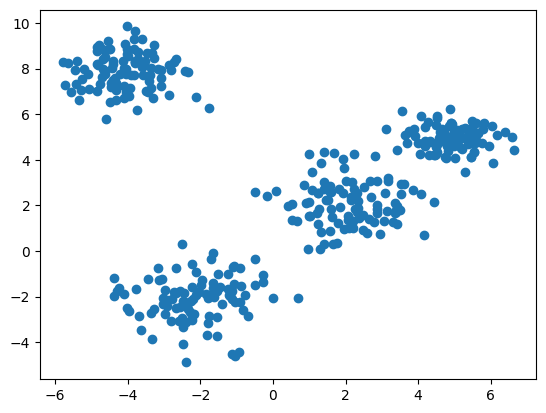

In [ ]:
plt.scatter(stacked_data[:,0],stacked_data[:,1])
plt.show()

In [ ]:
wcss = []
for i in range(1, 21):
    kmeans_instance = KMeans(n_clusters=i, random_state=0)
    kmeans_instance.fit(stacked_data)
    wcss_iter = kmeans_instance.inertia_
    wcss.append(wcss_iter)

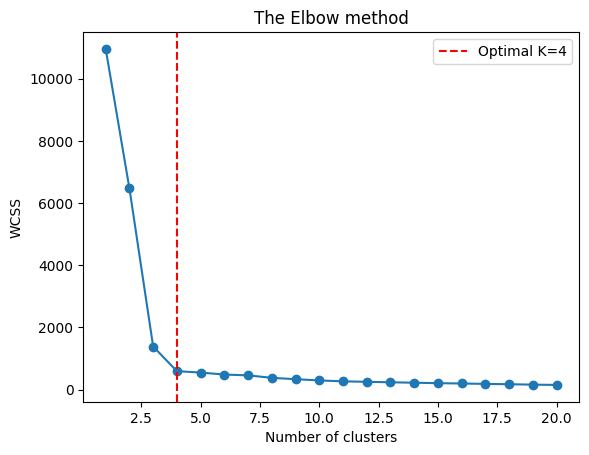

In [ ]:
import matplotlib.pyplot as plt
number_clusters = range(1,21)
plt.plot(number_clusters,wcss, marker='o')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.axvline(x=4, color='r', linestyle='--', label='Optimal K=4')
plt.ylabel('WCSS')
plt.legend()
plt.show()

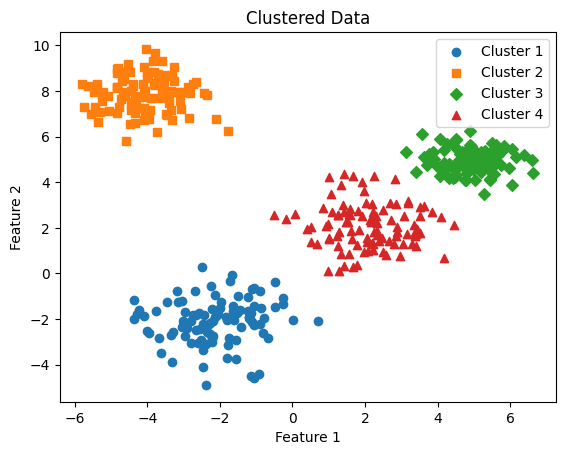

In [ ]:
kmeans_optimal = KMeans(n_clusters=4, random_state=0)
kmeans_optimal.fit(stacked_data)
centroids = kmeans_optimal.cluster_centers_
markers = ['o', 's', 'D', '^']
for i in range(4):
    cluster_data = stacked_data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker=markers[i], label=f'Cluster {i+1}')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, label='Centroids', edgecolor='black')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## What might happen if the value of the number of clusters is set too low in K-Means?

When we underestimate the number of clusters, some disjoint groups of data are forced to fit into one larger cluster. Like for example here, Example of a 2-dimensional dataset with 4 centres, requesting 3 clusters - 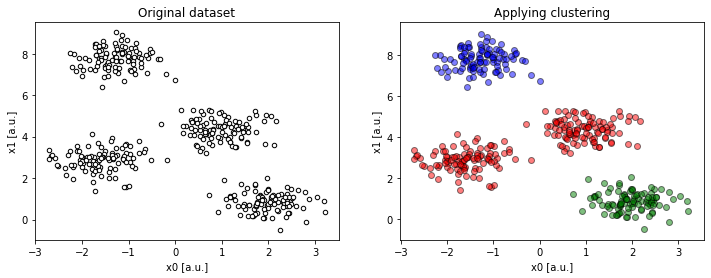

# too many clusters?
trying to wrap the data into too many clusters creates artificial boundaries within real data clusters, creating clusters that do not represent meaningful patterns in the data.
Example of a 2-dimensional dataset with 2 centres, requesting 4 clusters
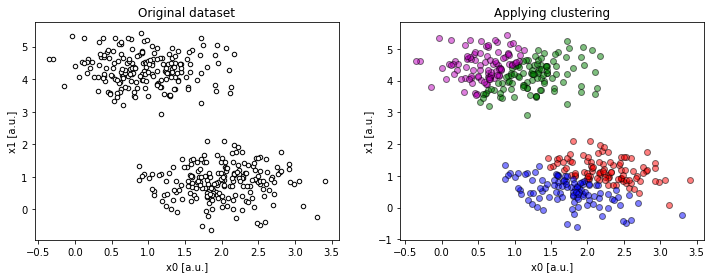

# What is the effect of initializing centroids far apart or too close together in K-Means, and how might this affect the final clustering?

Given kmeans iterative nature and the random initialization of centroids at the start of the algorithm, different initializations may lead to different clusters since kmeans algorithm may get stuck in a local optimum and may not converge to global optimum.
if the centroids are too far apart, the algorithm might take longer to converge to an optimum solution.
if they're too close, the clusters might be merged, making it hard to distinct them.

# How might you optimise the centroid initialisation to lead to better clustering?

Classical k-means clustering utilizes random centroid initialization.

*   K-means++ algorithm - We can give a pseudo-random start rather than a random start
*   Naive Sharding Centroid Initialization Algorithm - sorts data based on a composite attribute sum, then splits it into k shards and uses their means as initial centroids.




# Why might the Elbow Method not always provide a clear solution for choosing the optimal number of clusters?
*   Sometimes the Elbow point may not be apparent because the choice of the “elbow point” can be subjective and might vary between individuals analyzing the same data.
*   Elbow method only works for K-means since it evaluates the WCSS distance, and may not be suitable for other clustering algorithms with different objectives.
*    K-means itself is sensitive to initial cluster centroids, which can affect the WCSS values and, consequently, the choice of the optimal K.















# How can WCSS be influenced by the presence of outliers or noise in the data?

The elbow point represents the number of clusters beyond which the rate of decrease in WCSS significantly slows down. This suggests that adding more clusters doesn't substantially improve the clustering quality. K means struggles with noisy data and outliers, as they may distort the cluster centroids and boundaries, which might distort the curve and not provide an optimal elbow point in wcss. due to outliers, the within cluster sum of squares might inflate and also shift the elbow point.